In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.0.0-rc0


In [3]:
train_image_path = glob.glob('./flower_photos/*/*.jpg')

In [4]:
len(train_image_path)

0

In [7]:
train_image_path[:5]

['./dc/train\\cat\\cat.0.jpg',
 './dc/train\\cat\\cat.1.jpg',
 './dc/train\\cat\\cat.10.jpg',
 './dc/train\\cat\\cat.100.jpg',
 './dc/train\\cat\\cat.101.jpg']

In [8]:
train_image_path[-5:]

['./dc/train\\dog\\dog.995.jpg',
 './dc/train\\dog\\dog.996.jpg',
 './dc/train\\dog\\dog.997.jpg',
 './dc/train\\dog\\dog.998.jpg',
 './dc/train\\dog\\dog.999.jpg']

In [9]:
p = './dc/train\\dog\\dog.995.jpg'

In [10]:
int(p.split('\\')[1] == 'cat')

0

In [11]:
train_image_label = [int(p.split('\\')[1] == 'cat') for p in train_image_path]

In [12]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [43]:
def load_preprosess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [360, 360])
    image = tf.image.random_crop(image, [256, 256, 3])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.5)
    image = tf.image.random_contrast(image, 0, 1)
    image = tf.cast(image, tf.float32)
    image = image/255
    label = tf.reshape(label, [1])
    return image, label

In [44]:
#[1, 2, 3]  -->  [[1], [2], [3]]

In [45]:
#tf.image.convert_image_dtype

In [46]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path, train_image_label))

In [47]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [48]:
train_image_ds = train_image_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)

In [49]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

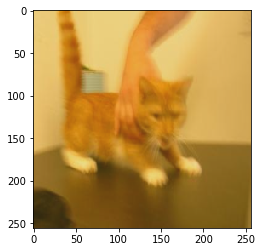

In [68]:
for img, label in train_image_ds.take(1):
    plt.imshow(img)

In [20]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [21]:
train_image_ds = train_image_ds.shuffle(train_count).batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)

In [22]:
test_image_path = glob.glob('./dc/test/*/*.jpg')
test_image_label = [int(p.split('\\')[1] == 'cat') for p in test_image_path]
test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path, test_image_label))
test_image_ds = test_image_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)
test_image_ds = test_image_ds.batch(BATCH_SIZE)
test_image_ds = test_image_ds.prefetch(AUTOTUNE)

In [23]:
len(test_image_path)

1000

In [25]:
imgs.shape

TensorShape([32, 256, 256, 3])

In [26]:
labels.shape

TensorShape([32, 1])

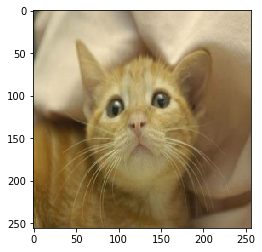

In [27]:
plt.imshow(imgs[0])

In [28]:
labels[0]

<tf.Tensor: id=75, shape=(1,), dtype=int32, numpy=array([1])>

In [33]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 128)     5

In [35]:
pred = model(imgs)

In [36]:
pred.shape

TensorShape([32, 1])

In [ ]:
np.array([p[0].numpy() for p in tf.cast(pred > 0, tf.int32)])

In [ ]:
np.array([l[0].numpy() for l in labels])

In [ ]:
ls = tf.keras.losses.BinaryCrossentropy()

In [ ]:
ls([0.,0.,1.,1.], [1.,1.,1.,1.])

In [ ]:
ls([[0.],[0.],[1.],[1.]], [[1.],[1.],[1.],[1.]])

In [ ]:
tf.keras.losses.binary_crossentropy([0.,0.,1.,1.], [1.,1.,1.,1.])

In [ ]:
optimizer = tf.keras.optimizers.Adam()

In [30]:
epoch_loss_avg = tf.keras.metrics.Mean('train_loss')
train_accuracy = tf.keras.metrics.Accuracy()

epoch_loss_avg_test = tf.keras.metrics.Mean('test_loss')
test_accuracy = tf.keras.metrics.Accuracy()

In [31]:
train_accuracy([1,0,1], [1,1,1])

<tf.Tensor: id=145, shape=(), dtype=float32, numpy=0.6666667>

In [32]:
def train_step(model, images, labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels, pred)
    grads = t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    epoch_loss_avg(loss_step)
    train_accuracy(labels, tf.cast(pred>0, tf.int32))

In [47]:
def test_step(model, images, labels):
    pred = model(images, trianing=False)
    loss_step = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels, pred)
    epoch_loss_avg_test(loss_step)
    test_accuracy(labels, tf.cast(pred>0, tf.int32))

In [39]:
train_loss_results = []
train_acc_results = []

test_loss_results = []
test_acc_results = []

In [40]:
num_epochs = 30

In [41]:
for epoch in range(num_epochs):
    for imgs_, labels_ in train_image_ds:
        train_step(model, imgs_, labels_)
        print('.', end='')
    print()
    
    train_loss_results.append(epoch_loss_avg.result())
    train_acc_results.append(train_accuracy.result())
    
    
    for imgs_, labels_ in test_image_ds:
        test_step(model, imgs_, labels_)
        
    test_loss_results.append(epoch_loss_avg_test.result())
    test_acc_results.append(test_accuracy.result())
    
    print('Epoch:{}: loss: {:.3f}, accuracy: {:.3f}, test_loss: {:.3f}, test_accuracy: {:.3f}'.format(
        epoch + 1,
        epoch_loss_avg.result(),
        train_accuracy.result(),
        epoch_loss_avg_test.result(),
        test_accuracy.result()
    ))
    
    epoch_loss_avg.reset_states()
    train_accuracy.reset_states()
    
    epoch_loss_avg_test.reset_states()
    test_accuracy.reset_states()

W0816 23:25:12.084194 12868 deprecation.py:323] From c:\users\guanghua\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


....

KeyboardInterrupt: 